In [1]:
pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 23.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7b2c122a237c651961cf9d03503989aba57d16903ffcb9

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')
import pandas_profiling

Mounted at /content/drive


<ipython-input-2-3b27f59427a4>:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


2. Divide the bank-full.csv file into training and test datasets using techniques similar to those that we described in class.

In [3]:
data = pd.read_csv('/content/drive/MyDrive/bank-full.csv')
data

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

Although I will be including all the variables in the models, in my opinion, for the target variable of subscribed to term deposit, it seems like the variables of age, education, housing, loan, job, pdays, poutcomes are going to be some of the variables that have significant impact on the target variable.

# Exploratory Data Analysis (EDA)



In [5]:
pandas_profiling.ProfileReport(data)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Missing values in the data
print("\nMissing Values in the Data:")
print(data.isnull().sum())


Missing Values in the Data:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


3. Encode the binary target variable that has values “yes” or “no” into a boolean as well as any binary or categorical variables in the input data that you feel will be relevant for classification models.

In [7]:
data['y'] = data['y'].map({'yes': True, 'no': False})

le = LabelEncoder()
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['education'] = le.fit_transform(data['education'])
data['default'] = le.fit_transform(data['default'])
data['housing'] = le.fit_transform(data['housing'])
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact'])
data['month'] = le.fit_transform(data['month'])
data['poutcome'] = le.fit_transform(data['poutcome'])

data.drop('duration', axis = 1, inplace = True)
print(data)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2        0     2143        1     0        2   
1       44    9        2          1        0       29        1     0        2   
2       33    2        1          1        0        2        1     1        2   
3       47    1        1          3        0     1506        1     0        2   
4       33   11        2          3        0        1        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    9        1          2        0      825        0     0        0   
45207   71    5        0          0        0     1729        0     0        0   
45208   72    5        1          1        0     5715        0     0        0   
45209   57    1        1          1        0      668        0     0        1   
45210   37    2        1          1        0     2971        0     0        0   

       day  month  campaign

#4. Train different scikit-learn binary classification models including logistic regression, decision trees, random forests, support vector classifiers, and any additional methods that you feel are relevant on your prepared data.

# Logistic Regresssion



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_recall_curve, auc, classification_report

X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_l = LogisticRegression(random_state=42)
model_l.fit(X_train, y_train)

y_pred = model_l.predict(X_test)

accuracy_l = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy on test set: {accuracy_l}")


Logistic Regression Accuracy on test set: 0.8778060378193078


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
coefs = model_l.coef_[0]
vars = X.columns

coef_df = pd.DataFrame({'Variable': vars, 'Coefficient': coefs})
print(coef_df)

     Variable  Coefficient
0         age    -0.014602
1         job     0.023272
2     marital    -0.051890
3   education     0.005103
4     default    -0.005191
5     balance     0.000034
6     housing    -0.155340
7        loan    -0.047060
8     contact    -0.181856
9         day    -0.011808
10      month    -0.051485
11   campaign    -0.259889
12      pdays    -0.000299
13   previous     0.112237
14   poutcome    -0.118176


              precision    recall  f1-score   support

       False       0.88      1.00      0.93      7952
        True       0.21      0.00      0.01      1091

    accuracy                           0.88      9043
   macro avg       0.54      0.50      0.47      9043
weighted avg       0.80      0.88      0.82      9043



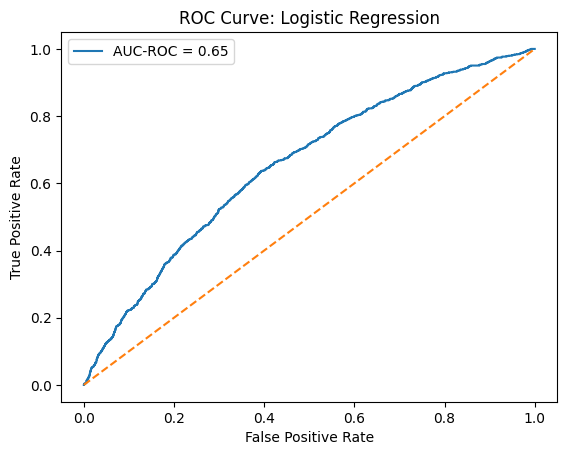

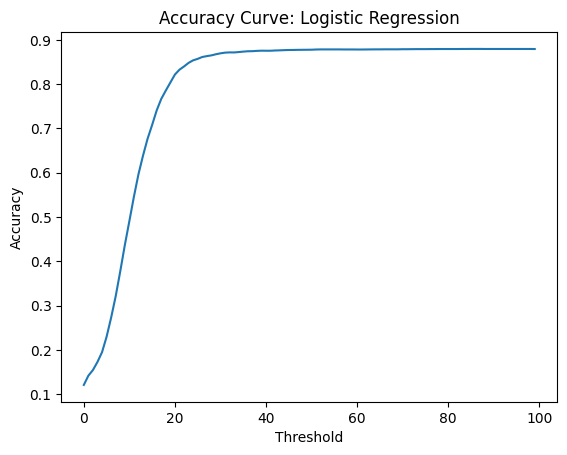

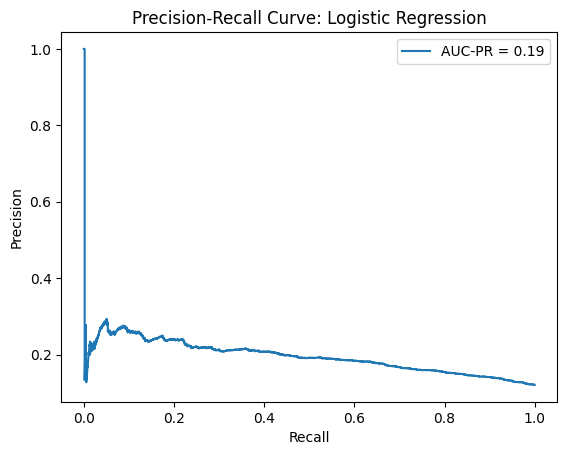

In [10]:
auc_roc_l = roc_auc_score(y_test, model_l.predict_proba(X_test)[:, 1])
precision_l, recall_l, _ = precision_recall_curve(y_test, model_l.predict_proba(X_test)[:, 1])
auc_pr_l = auc(recall_l, precision_l)
report_l = classification_report(y_test, y_pred)

print(report_l)

fpr_l, tpr_l, _ = roc_curve(y_test, model_l.predict_proba(X_test)[:, 1])
plt.plot(fpr_l, tpr_l, label=f'AUC-ROC = {auc_roc_l:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend()
plt.show()

accuracy_list_l = []
thresholds = list(range(0, 100))
for threshold in thresholds:
    y_pred = (model_l.predict_proba(X_test)[:, 1] >= threshold/100).astype(int)
    accuracy_list_l.append(accuracy_score(y_test, y_pred))
plt.plot(thresholds, accuracy_list_l)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve: Logistic Regression')
plt.show()

plt.plot(recall_l, precision_l, label=f'AUC-PR = {auc_pr_l:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Logistic Regression')
plt.legend()
plt.show()


# Decision Trees

In [11]:
from sklearn.tree import DecisionTreeClassifier

model_d = DecisionTreeClassifier(random_state=42)
model_d.fit(X_train, y_train)

y_pred = model_d.predict(X_test)

accuracy_d = accuracy_score(y_test, y_pred)
report_d = classification_report(y_test, y_pred)

print(f'Decision Tree Accuracy: {accuracy_d:.2f}')
print(report_d)


Decision Tree Accuracy: 0.82
              precision    recall  f1-score   support

       False       0.91      0.89      0.90      7952
        True       0.29      0.33      0.31      1091

    accuracy                           0.82      9043
   macro avg       0.60      0.61      0.60      9043
weighted avg       0.83      0.82      0.83      9043



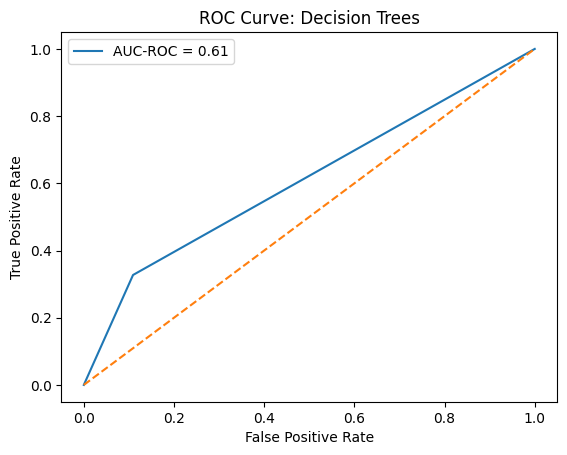

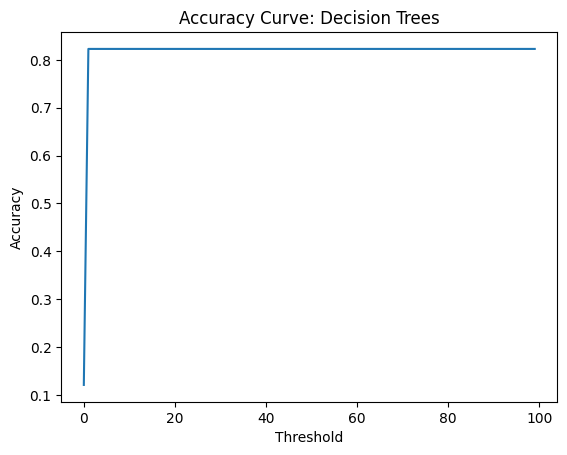

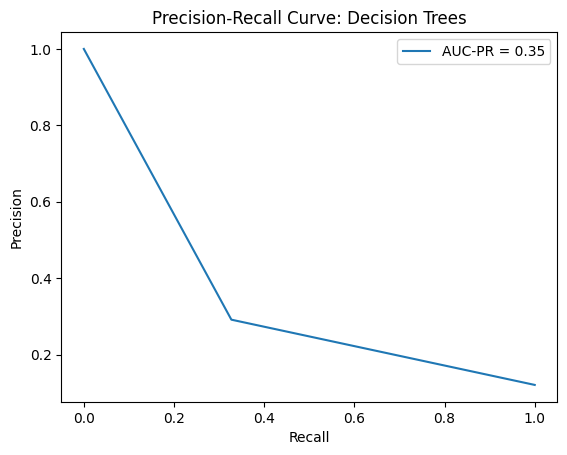

In [12]:
auc_roc_d= roc_auc_score(y_test, model_d.predict_proba(X_test)[:, 1])
precision_d, recall_d, _ = precision_recall_curve(y_test, model_d.predict_proba(X_test)[:, 1])
auc_pr_d = auc(recall_d, precision_d)
report_d = classification_report(y_test, y_pred)


fpr_d, tpr_d, _ = roc_curve(y_test, model_d.predict_proba(X_test)[:, 1])
plt.plot(fpr_d, tpr_d, label=f'AUC-ROC = {auc_roc_d:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Decision Trees')
plt.legend()
plt.show()

accuracy_list_d = []
thresholds = list(range(0, 100))
for threshold in thresholds:
    y_pred = (model_d.predict_proba(X_test)[:, 1] >= threshold/100).astype(int)
    accuracy_list_d.append(accuracy_score(y_test, y_pred))
plt.plot(thresholds, accuracy_list_d)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve: Decision Trees')
plt.show()

plt.plot(recall_d, precision_d, label=f'AUC-PR = {auc_pr_d:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Decision Trees')
plt.legend()
plt.show()


# Random Forest

Random Forest Accuracy: 0.8917394669910428
              precision    recall  f1-score   support

       False       0.90      0.99      0.94      7952
        True       0.72      0.17      0.27      1091

    accuracy                           0.89      9043
   macro avg       0.81      0.58      0.61      9043
weighted avg       0.88      0.89      0.86      9043



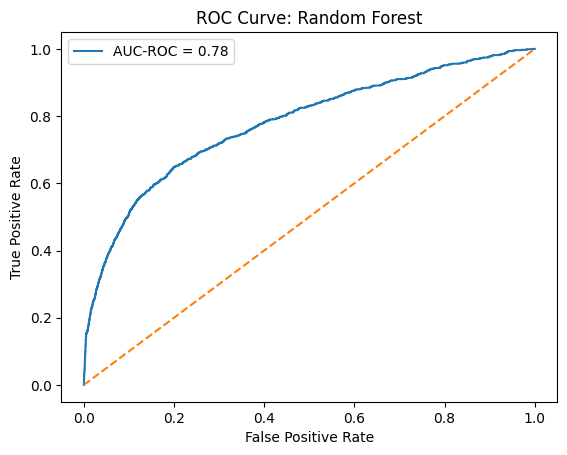

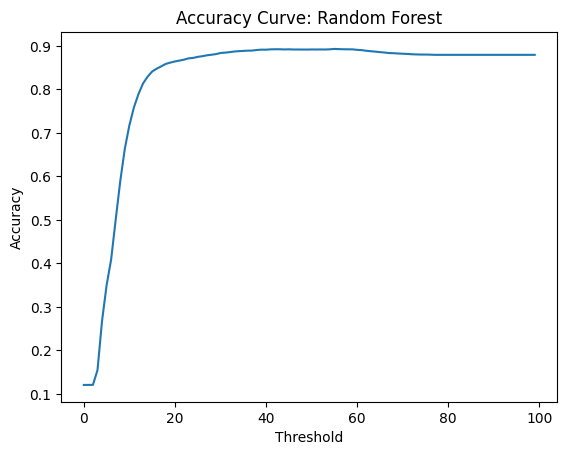

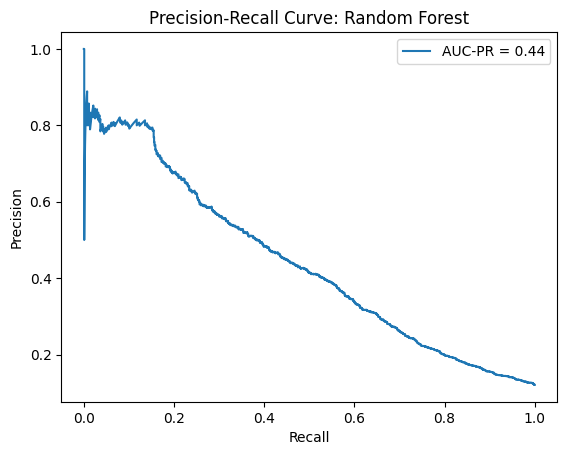

In [13]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy_r = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy_r)

y_score_r = clf.predict_proba(X_test)[:, 1]
fpr_r, tpr_r, thresholds = roc_curve(y_test, y_score_r)
roc_auc_r = auc(fpr_r, tpr_r)
auc_roc_r= roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
precision_r, recall_r, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
auc_pr_r = auc(recall_r, precision_r)

report_r = classification_report(y_test, y_pred)

print(report_r)

fpr_r, tpr_r, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr_r, tpr_r, label=f'AUC-ROC = {auc_roc_r:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest')
plt.legend()
plt.show()

accuracy_list_r = []
thresholds = list(range(0, 100))
for threshold in thresholds:
    y_pred = (clf.predict_proba(X_test)[:, 1] >= threshold/100).astype(int)
    accuracy_list_r.append(accuracy_score(y_test, y_pred))
plt.plot(thresholds, accuracy_list_r)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve: Random Forest')
plt.show()

plt.plot(recall_r, precision_r, label=f'AUC-PR = {auc_pr_r:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Random Forest')
plt.legend()
plt.show()


# Support Vector Machines

SVM Accuracy: 0.8793541966161672


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.88      1.00      0.94      7952
        True       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



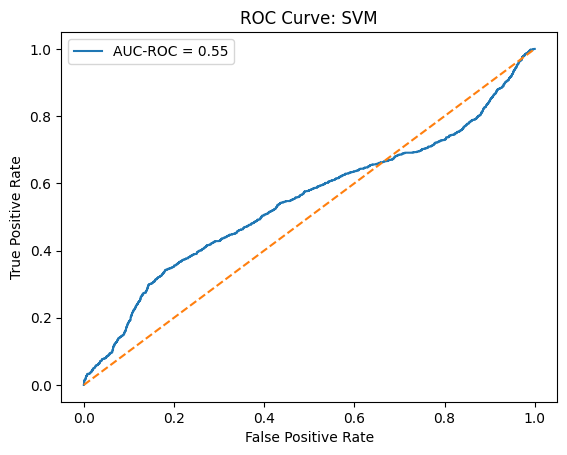

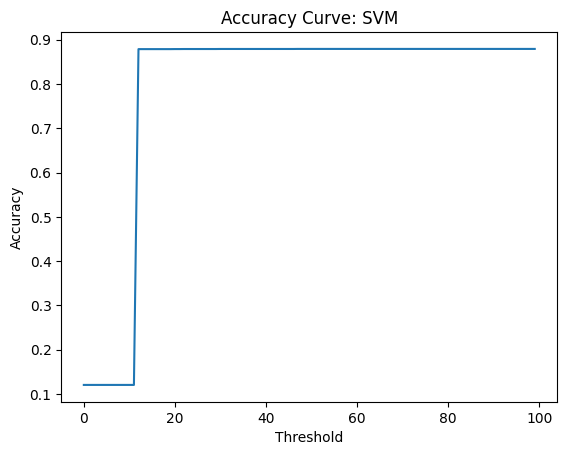

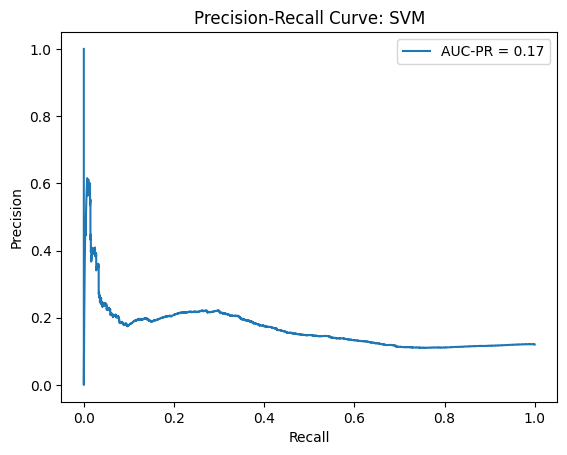

In [14]:
from sklearn.svm import SVC

model_sc = SVC(kernel='rbf', probability=True)

#model_sc = SVC(kernel='linear', probability=True, random_state=42)
model_sc.fit(X_train, y_train)

y_pred = model_sc.predict(X_test)

accuracy_sc = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy_sc)

fpr_sc, tpr_sc, thresholds = roc_curve(y_test, model_sc.predict_proba(X_test)[:,1])
auc_roc_sc = auc(fpr_sc, tpr_sc)
precision_sc, recall_sc, _ = precision_recall_curve(y_test, model_sc.predict_proba(X_test)[:, 1])
auc_pr_sc = auc(recall_sc, precision_sc)

report_sc = classification_report(y_test, y_pred)
print(report_sc)

plt.plot(fpr_sc, tpr_sc, label=f'AUC-ROC = {auc_roc_sc:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: SVM')
plt.legend()
plt.show()

accuracy_list_sc = []
thresholds = list(range(0, 100))
for threshold in thresholds:
    y_pred = (model_sc.predict_proba(X_test)[:, 1] >= threshold/100).astype(int)
    accuracy_list_sc.append(accuracy_score(y_test, y_pred))
plt.plot(thresholds, accuracy_list_sc)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve: SVM')
plt.show()

plt.plot(recall_sc, precision_sc, label=f'AUC-PR = {auc_pr_sc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: SVM')
plt.legend()
plt.show()


6. What conclusions can you draw from the comparison you did in the prior point
about the relative strengths of different classifiers?

Answer: Based on this dataset (excluding "duration" variable), as far as the accuracy is concerned, decision trees seems to be the worst performing classifier with an accuracy of 83% while other classifiers are achieving 87% and above. From accuracy and ROC point of view, Random Forest gives the best results. Its ROC is more towards the top left corner of the chart telling us that it has higher AUC of 0.78 and hence better performance. Even for precision-recall curve, random forest seems to be the best performing model with AUC of 0.44. While SVM seems to be the worst performing classifier based on AUC of precision-recall curve.